In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../data.csv', index_col=0)
df_preprocessed = pd.read_csv('../preprocessed_data.csv', index_col = 0)

In [8]:
def fix_value(x: str) -> str:
    if (x.find('.') == -1):
        return x
    else:
        return x[:len(x)-1].replace('.', '')

In [9]:
df['Value'] = df['Value'].replace({
    '€': '',
    'M': '000000',
    'K': '000'
}, regex=True).map(fix_value).convert_objects(convert_numeric=True)

/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [10]:
est_kmeans = KMeans(n_clusters=4).fit(df_preprocessed[['Value', 'Skill Moves', 'Marking',
                                                      'BallControl', 'Finishing']])

In [11]:
df['Labels'] = est_kmeans.labels_

In [12]:
import matplotlib.pyplot as plt

In [13]:
colors = ['Black', 'Green', 'Blue', 'Red']

In [14]:
df['Position'].replace({
    'GK': 0.0,
    'CB': 1.0,
    'LCB': 1.0,
    'RCB': 1.0,
    'LB': 1.5,
    'RB': 1.5,
    'RWB': 1.9,
    'LWB': 1.9,
    'CM': 2,
    'LCM': 2,
    'RCM': 2,
    'CDM': 1.5,
    'LDM': 1.5,
    'RDM': 1.5,
    'LM': 2.5,
    'RM': 2.5,
    'RAM': 3,
    'CAM': 3,
    'LAM': 3,
    'LW': 3.5,
    'RW': 3.5,
    'CF': 3.8,
    'LF': 3.8,
    'RF': 3.8,
    'LS': 3.9,
    'RS': 3.9,
    'ST': 4.2
}, inplace=True)

In [29]:
fig = plt.figure(figsize=(25, 22), dpi=80)
%matplotlib inline
plt.xticks([range(0, 4.2, 0.2)])

TypeError: 'float' object cannot be interpreted as an integer

/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


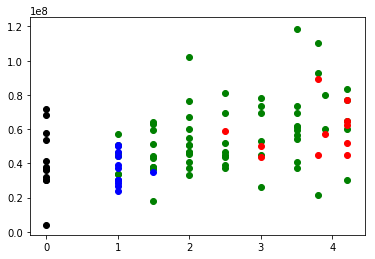

In [27]:
for j in range(4):
    cluster = df.head(100)[df['Labels'] == j]
    plt.scatter(cluster['Position'], cluster['Value'], color=colors[j])
    
plt.show()

In [30]:
df_preprocessed.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Position',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')